## PROJECT : ANOMALY DETECTION USING AUTO-ENCODERS FOR PREDICTIVE MAINTENANCE APPLICATIONS

**NAME : ABHISHEK DUTTAGUPTA**

**STUDENT ID : 22312353**

*PART 1 : ANALYSING THE DATA SET*

In [6]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import plotly.express as px

In [2]:
# Loading the CSV file into a Pandas DataFrame
data = pd.read_csv('dataset.csv')
data

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,M24855,M,298.8,308.4,1604,29.5,14,0,0,0,0,0,0
9996,9997,H39410,H,298.9,308.4,1632,31.8,17,0,0,0,0,0,0
9997,9998,M24857,M,299.0,308.6,1645,33.4,22,0,0,0,0,0,0
9998,9999,H39412,H,299.0,308.7,1408,48.5,25,0,0,0,0,0,0


Here we, notice a dataset of 10000 X 14 rows, with each row having unique UDI and product ID's. Type divides the machinery's into low, medium and high, with each machinary having features like as Air Temperature [K], Process Temperature [K], Rotational Speed [rpm], Torque [Nm] and tool wear [minutes]. The dataset is finally a classification dataset depending on the label Machine failure, where 0 indicates 'not failed' and 1 indicates 'failed'. TWF, HDF,PWF, OSF and RNF are finally the kinds of failure that can be associated with a machine, if any of these failures are one, we will have a Machine failure. The problem in hand is that based on these features and label we design a anomoly detection using auto-encoders. For now, lets analyse the data more.   

Plotting the graphs, to check the features representations across the datasets

In [5]:
# Plotting a bar graph to see the number of low, medium and high kind of machinary 
# Create a grouped DataFrame to count the number of occurrences of each type of machinery
grouped_data = data.groupby('Type')['UDI'].count().reset_index()

# Create a bar chart using Plotly
fig = go.Figure([go.Bar(x=grouped_data['Type'], y=grouped_data['UDI'])])

# Update the layout of the chart
fig.update_layout(title='Number of L/M/H Machinery',
                  xaxis_title='Type',
                  yaxis_title='Number of Machinery')

# Show the chart
fig.show()

In [8]:
# plotting a line graph to see air temperature and process temperature throughout the machinary list
# Create Line plot
fig = px.line(data, x=data['UDI'], y=data['Air temperature [K]'])

# Add Scatter plot
fig.add_scatter(x=data['UDI'], y=data['Process temperature [K]'])

# Display the plot
fig.show()

In [9]:
data['Machine failure'].value_counts()

Machine failure
0    9661
1     339
Name: count, dtype: int64

In [22]:
# Adding the failure as black dots in the same plot

# Create a new figure
fig = go.Figure()

# Add Line plot for air temperature
fig.add_trace(go.Scatter(x=data['UDI'], y=data['Air temperature [K]'], mode='lines', name='Air temperature'))

# Add Scatter plot for process temperature
fig.add_trace(go.Scatter(x=data['UDI'], y=data['Process temperature [K]'], mode='lines', name='Process temperature'))

# Add Scatter plot for machine failures
failures = data[data['Machine failure']==1]
fig.add_trace(go.Scatter(x=failures['UDI'], y=failures['Air temperature [K]'], mode='markers', 
                         marker=dict(color='black', size=5), name='Failure point'))

# Display the plot
fig.show()

In [28]:
# Doing the same with rotational speed
# Create a new figure
fig = go.Figure()

# Add Line plot for air temperature
fig.add_trace(go.Scatter(x=data['UDI'], y=data['Rotational speed [rpm]'], mode='lines', name='Rotational speed [rpm]'))

# Add Scatter plot for machine failures
failures = data[data['Machine failure']==1]
fig.add_trace(go.Scatter(x=failures['UDI'], y=failures['Rotational speed [rpm]'], mode='markers', 
                         marker=dict(color='black', size=5), name='Failure point'))

# Display the plot
fig.show()

In [26]:
# And again with Torque
# Create a new figure
fig = go.Figure()

# Add Line plot for air temperature
fig.add_trace(go.Scatter(x=data['UDI'], y=data['Torque [Nm]'], mode='lines', name='Torque [Nm]'))

# Add Scatter plot for machine failures
failures = data[data['Machine failure']==1]
fig.add_trace(go.Scatter(x=failures['UDI'], y=failures['Torque [Nm]'], mode='markers', 
                         marker=dict(color='black', size=5), name='Failure point'))

# Display the plot
fig.show()

In [29]:
# Finally plotting the different kind of failures for analysis
# Calculate the count of failures for each type
failure_counts = data[['TWF', 'HDF', 'PWF', 'OSF', 'RNF']].sum()

# Create the bar plot
fig = px.bar(x=failure_counts.index, y=failure_counts.values)

# Set the axis labels and title
fig.update_layout(
    xaxis_title='Type of Failure',
    yaxis_title='Number of Failures',
    title='Number of Failures by Type'
)

# Display the plot
fig.show()


In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Machine failure          10000 non-null  int64  
 9   TWF                      10000 non-null  int64  
 10  HDF                      10000 non-null  int64  
 11  PWF                      10000 non-null  int64  
 12  OSF                      10000 non-null  int64  
 13  RNF                      10000 non-null  int64  
dtypes: float64(3), int64(9)

*PART 2 : PREPARING DATASET FOR ANOMALY DETECTION* 

Since, from the above and the espicially from the paper by Stephan Matzka on Explainable Artificial Intelligence for Predictive Maintenance Applications. we come to terms that the important columns required for anomaly detection is rotational speed and torque, so for that reason we will drop the other columns.

In [32]:
data_nx = data
data_nx = data_nx.drop(['UDI', 'Product ID', 'Type', 'Air temperature [K]', 'Process temperature [K]', 
                  'Tool wear [min]', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF'], axis=1)
data_nx

,Rotational speed [rpm],Torque [Nm],Machine failure
0,1551,42.8,0
1,1408,46.3,0
2,1498,49.4,0
3,1433,39.5,0
4,1408,40.0,0
...,...,...,...
9995,1604,29.5,0
9996,1632,31.8,0
9997,1645,33.4,0
9998,1408,48.5,0


Here Rotational Speed [rpm] and Torque are the features and Machine Failure are labels for the encoders, with features being X and Machine Failure being Y.

Now, creating a safe mask and fail mask depending on the Machine Failure value being 0 or 1. 

In [40]:
safe_mask = data_nx['Machine failure']==0 #All safe data points
fail_mask = data_nx['Machine failure']==1 #All fail data points
df_safe = data_nx[safe_mask]
df_fail = data_nx[fail_mask]

# sanity check to see number of good or bad points
print("safe machine count : ", len(df_safe))
print("fail machine count : ", len(df_fail))

safe machine count :  9661
fail machine count :  339


In [42]:
# Feature vector that goes to neural net
x_safe = df_safe.values
x_fail = df_fail.values

# dividing the safe value into a training and testing datasets with 25%.
from sklearn.model_selection import train_test_split
x_safe_train, x_safe_test = train_test_split(x_safe, test_size=0.25, random_state=42)

print("Safe train count  : ", len(x_safe_train))
print("Safe test count : ", len(x_safe_test))


Safe train count  :  7245
Safe test count :  2416


*PART 3 : CREATING THE AUTO ENCODER NEURAL NETWORK* 

In [51]:
# creating the encoder neural network and displaying the network summary
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(100, input_dim=x_safe.shape[1], activation='relu'))
model.add(Dense(30, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(x_safe.shape[1]))
model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 100)               400       
                                                                 
 dense_10 (Dense)            (None, 30)                3030      
                                                                 
 dense_11 (Dense)            (None, 100)               3100      
                                                                 
 dense_12 (Dense)            (None, 3)                 303       
                                                                 
Total params: 6,833
Trainable params: 6,833
Non-trainable params: 0
_________________________________________________________________


Epoch 1/500
227/227 [==============================] - 0s 668us/step - loss: 0.0681
Epoch 2/500
227/227 [==============================] - 0s 655us/step - loss: 0.7877
Epoch 3/500
227/227 [==============================] - 0s 642us/step - loss: 0.0691
Epoch 4/500
227/227 [==============================] - 0s 655us/step - loss: 0.6717
Epoch 5/500
227/227 [==============================] - 0s 646us/step - loss: 0.4445
Epoch 6/500
227/227 [==============================] - 0s 792us/step - loss: 0.5554
Epoch 7/500
227/227 [==============================] - 0s 646us/step - loss: 0.3055
Epoch 8/500
227/227 [==============================] - 0s 619us/step - loss: 0.9184
Epoch 9/500
227/227 [==============================] - 0s 659us/step - loss: 0.2626
Epoch 10/500
227/227 [==============================] - 0s 615us/step - loss: 0.6015
Epoch 11/500
227/227 [==============================] - 0s 624us/step - loss: 0.6860
Epoch 12/500
227/227 [==============================] - 0s 624us/step - lo

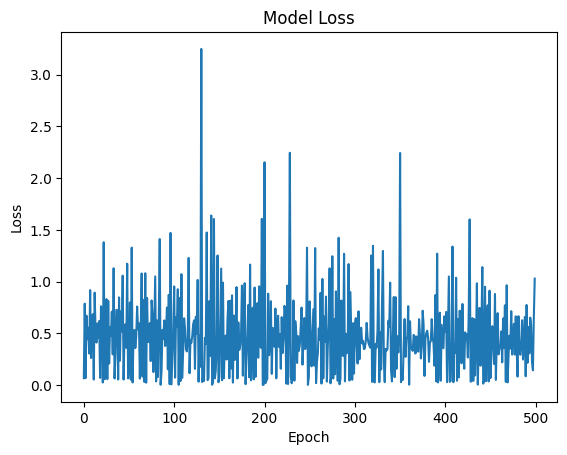

In [64]:
# Fitting the model against the training set with 500 epochs

import matplotlib.pyplot as plt

history = model.fit(x_safe_train, x_safe_train, verbose=1, epochs=500)

# Plot the training loss
plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

*PART 4 : TESTING THE NETWORK AGAINST TEST AND FAIL SET* 

In [65]:
from sklearn import metrics
# predicting the mse against test set
pred1 = model.predict(x_safe_test)
scorel = np.sqrt(metrics.mean_squared_error(pred1,x_safe_test))


76/76 [==============================] - 0s 453us/step


In [66]:
# predicting the mse against the reconstructed set
pred2 = model.predict(x_safe) 
score2 = np.sqrt(metrics.mean_squared_error(pred2,x_safe))


302/302 [==============================] - 0s 439us/step


In [67]:
# predicting the mse against the failed machinery set
pred3= model.predict(x_fail) 
score3 = np.sqrt(metrics.mean_squared_error(pred3,x_fail))


11/11 [==============================] - 0s 501us/step


In [116]:
# printing the mse with score 1 (results against training set), score 2 (results against test set) and score 3 (results against the fail set). 
# The expected score 3 should be higher than score 1 and score 2, with score 3 showing the anamoly.
print("MSE for test set : ", scorel)
print("MSE for resconstructed set  : ", score2)
print("MSE for failed machinery set  : ", score3)

MSE for test set :  0.2767935306694168
MSE for resconstructed set  :  0.27750513043984687
MSE for failed machinery set  :  0.9982936000435506


The MSE for the failed set is more than the safe datasets.

In [118]:
# Plotting a bar graph to prove that the reconstruction error for the combined samples is higher values for anomalous points 
# Convert numpy arrays to lists
scorel_list = round(scorel, 3)
score2_list = round(score2, 3)
score3_list = round(score3, 3)

# Create a new plotly figure
fig = go.Figure()

# Add the bar trace for score1
fig.add_trace(go.Bar(x=['test set'], y=[scorel_list], name='test set'))

# Add the bar trace for score2
fig.add_trace(go.Bar(x=['resconstructed set'], y=[score2_list], name='resconstructed set'))

# Add the bar trace for score3
fig.add_trace(go.Bar(x=['failed machinery set'], y=[score3_list], name='failed machinery set'))

# Set the layout
fig.update_layout(title='Bar Graph of Mean Squared Error', xaxis_title='Dataset', yaxis_title='MSE')

# Show the plot
fig.show()

In [89]:
# creating The histogram of the reconstruction error for the different samples is higher values for anomalous points.
# (Zoom the interactive plot to see, black lines for analomous plot and blue lines for safe points)
from sklearn.metrics import mean_squared_error
x_new = data_nx.values

# Predict the reconstructed output
pred_f = model.predict(x_new)

# Calculate the mean squared error between the original input and reconstructed output
mse = [mean_squared_error(x_new[i], pred_f[i]) for i in range(len(x_new))]

# Create a list of colors based on the values in the third column of x_new
colors = ['blue' if x[2] == 0 else 'black' for x in x_new]

# Create a new plotly figure
fig = go.Figure()

# Add the bar trace for mse
fig.add_trace(go.Bar(x=[i+1 for i in range(len(x_new))], y=mse, marker_color=colors))

# Set the layout
fig.update_layout(title='Histogram of Mean Squared Error for Different Samples', xaxis_title='Sample Number', yaxis_title='MSE')

# Show the plot
fig.show()

313/313 [==============================] - 0s 478us/step


*PART 5 : EXPERIMENTING WITH TWF VALUES AND TOOL WEAR VALUES EFFECT ON THE PERFORMANCE OF AUTO ENCODERS* 

In [90]:
# Doing the same thing, by including tool wear duration only for tool wear failure mode, as described in the paper, decision tree structure also depends on tool wear failure in addition to 
# rotational speed and torque. Here we keep TWF, Tool wear, torque and rotational speed only and drop Machine Failure in contrast to before.
data_nx2 = data
data_nx2 = data_nx2.drop(['UDI', 'Product ID', 'Type', 'Air temperature [K]', 'Process temperature [K]', 
                  'Machine failure', 'HDF', 'PWF', 'OSF', 'RNF'], axis=1)
data_nx2

,Rotational speed [rpm],Torque [Nm],Tool wear [min],TWF
0,1551,42.8,0,0
1,1408,46.3,3,0
2,1498,49.4,5,0
3,1433,39.5,7,0
4,1408,40.0,9,0
...,...,...,...,...
9995,1604,29.5,14,0
9996,1632,31.8,17,0
9997,1645,33.4,22,0
9998,1408,48.5,25,0


In [113]:
# repeating above steps same with TWF.
safe_mask2 = data_nx2['TWF']==0 #All TWF safe data points
fail_mask2 = data_nx2['TWF']==1 #All TWF fail data points
df_safe2 = data_nx2[safe_mask2]
df_fail2 = data_nx2[fail_mask2]

# Feature vector that goes to neural net
x_safe2 = df_safe2.values
x_fail2 = df_fail2.values

# dividing the safe value into a training and testing datasets with 25%.
x_safe_train2, x_safe_test2 = train_test_split(x_safe2, test_size=0.25, random_state=42)


array([[1622. ,   30.5,   14. ,    0. ],
       [1352. ,   52.8,   41. ,    0. ],
       [1704. ,   29.5,    0. ,    0. ],
       ...,
       [1448. ,   52.1,   71. ,    0. ],
       [1419. ,   45.2,   27. ,    0. ],
       [2204. ,   16.6,  175. ,    0. ]])

In [123]:
model2 = Sequential()
model2.add(Dense(100, input_dim=x_safe2.shape[1], activation='relu'))
model2.add(Dense(30, activation='relu'))
model2.add(Dense(100, activation='relu'))
model2.add(Dense(x_safe2.shape[1]))
model2.compile(optimizer='adam', loss='mean_squared_error')
model2.summary()


model2.fit(x_safe_train2, x_safe_train2, verbose=1, epochs=500)

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_25 (Dense)            (None, 100)               500       
                                                                 
 dense_26 (Dense)            (None, 30)                3030      
                                                                 
 dense_27 (Dense)            (None, 100)               3100      
                                                                 
 dense_28 (Dense)            (None, 4)                 404       
                                                                 
Total params: 7,034
Trainable params: 7,034
Non-trainable params: 0
_________________________________________________________________
Epoch 1/500
234/234 [==============================] - 0s 675us/step - loss: 33223.8438
Epoch 2/500
234/234 [==============================] - 0s 635us/step - loss: 530.4592
Epoch 3/50

In [124]:
pred1_2 = model2.predict(x_safe_test2)
scorel_2 = np.sqrt(metrics.mean_squared_error(pred1_2,x_safe_test2))

pred2_2 = model2.predict(x_safe2) 
score2_2 = np.sqrt(metrics.mean_squared_error(pred2_2,x_safe2))

pred3_2= model2.predict(x_fail2) 
score3_2 = np.sqrt(metrics.mean_squared_error(pred3_2,x_fail2))

print("MSE for test set  : ", scorel_2)
print("MSE for reconstructed set  : ", score2_2)
print("MSE for failed machinery set  : ", score3_2)

2/2 [==============================] - 0s 1ms/step
MSE for test set  :  0.12194125831358633
MSE for reconstructed set  :  0.12135661085571235
MSE for failed machinery set  :  0.4915527910380154


In [125]:
scorel_2_list = round(scorel_2, 3)
score2_2_list = round(score2_2, 3)
score3_2_list = round(score3_2, 3)

# Create a new plotly figure
fig = go.Figure()

# Add the bar trace for score1
fig.add_trace(go.Bar(x=['test set'], y=[scorel_2_list], name='test set'))

# Add the bar trace for score2
fig.add_trace(go.Bar(x=['resconstructed set'], y=[score2_2_list], name='resconstructed set'))

# Add the bar trace for score3
fig.add_trace(go.Bar(x=['failed machinery set'], y=[score3_2_list], name='failed machinery set'))

# Set the layout
fig.update_layout(title='Bar Graph of Mean Squared Error', xaxis_title='Dataset', yaxis_title='MSE')

# Show the plot
fig.show()